In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import joblib

# Load preprocessed data
df = pd.read_csv("accurate_sensor_data.csv")

# Drop any unwanted columns
df = df.drop(columns=['Unnamed: 4'], errors='ignore')

# Add time_diff and cumulative fuel if not already in file
df['time_diff'] = 1
df['cumulative_fuel_quantity'] = (df['Flow_Rate_L_s'] * df['time_diff']).cumsum()

# Define features and target
features = ['Temperature_C', 'Flow_Rate_L_s', 'Pressure_kPa', 'time_diff']
target = 'cumulative_fuel_quantity'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Save model
joblib.dump(model, "fuel_quantity_model.pkl")

print(f"✅ Model saved as 'fuel_quantity_model.pkl'")
print(f"📊 RMSE: {rmse:.4f}, R² Score: {r2:.4f}")


✅ Model saved as 'fuel_quantity_model.pkl'
📊 RMSE: 102.3369, R² Score: 1.0000


In [45]:
import pandas as pd
import joblib

# === Load the trained model ===
model = joblib.load("fuel_quantity_model.pkl")

# === Load the faulty sensor data ===
df = pd.read_csv("faulty_sensor_data (1).csv")

# === Define features used during training ===
features = ['Temperature_C', 'Flow_Rate_L_s', 'Pressure_kPa', 'time_diff']

# === Make sure required columns are present ===
for col in features:
    if col not in df.columns:
        raise ValueError(f"❌ Missing column: {col}")

# === Make predictions ===
X = df[features]
df['predicted_fuel_quantity'] = model.predict(X)

# === Save to new CSV ===
df.to_csv("faulty_with_predictions.csv", index=False)
print("✅ Predictions saved to 'faulty_with_predictions.csv'")



✅ Predictions saved to 'faulty_with_predictions.csv'


/tmp/ipython-input-46-3687822401.py:8: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start='2024-01-01', periods=len(df), freq='1S')


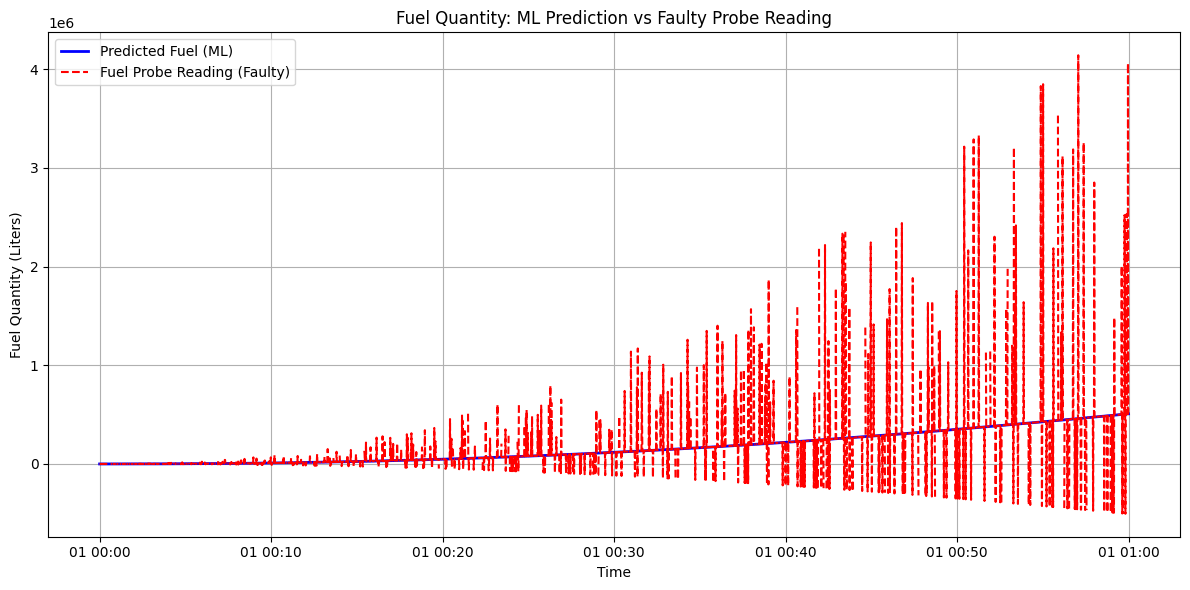

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load prediction results ===
df = pd.read_csv("faulty_with_predictions.csv")

# === Create synthetic timestamps (1 second intervals) ===
df['timestamp'] = pd.date_range(start='2024-01-01', periods=len(df), freq='1S')

# === Plot ===
plt.figure(figsize=(12, 6))

# Predicted fuel quantity
plt.plot(df['timestamp'], df['predicted_fuel_quantity'], label='Predicted Fuel (ML)', color='blue', linewidth=2)

# Fuel probe reading (which includes corrupted values)
plt.plot(df['timestamp'], df['fuel_probe_reading'], label='Fuel Probe Reading (Faulty)', color='red', linestyle='--')

# Labels & styling
plt.title("Fuel Quantity: ML Prediction vs Faulty Probe Reading")
plt.xlabel("Time")
plt.ylabel("Fuel Quantity (Liters)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# New Section